In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv('/content/BankChurners.csv')

In [11]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [12]:
dff = df.iloc[:,0:20]
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [13]:
dff

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722


In [14]:
dff.drop(['CLIENTNUM'],axis = 1 , inplace = True)

In [15]:
dff['Attrition_Flag'].value_counts()         # it has been observed that attrition flag (o/p) is imbalanced

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [16]:
dff['Attrition_Flag'] = dff['Attrition_Flag'].map({'Existing Customer' : 0 , 'Attrited Customer' : 1})

In [17]:
dff['Gender'] = dff['Gender'].map({'F' : 0 , 'M' : 1})

In [18]:
dff['Education_Level'].value_counts() 

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [19]:
#unknown in education column is comparitively well i thought it is better to be merged in between the two highest summed categories i.e,

In [20]:
dff['Education_Level'] = df['Education_Level']
ed = {'Uneducated':1 , 'High School':2  , 'Unknown' : 4.5 , 'College' : 3 , 'Graduate': 4,'Post-Graduate' : 5,'Doctorate' : 6}
dff['Education_Level'] = dff['Education_Level'].map(ed)

In [21]:

mar = pd.get_dummies(dff['Marital_Status'] , drop_first = True)


In [22]:
dff = pd.concat([dff,mar] , axis = 1)
dff.drop(['Marital_Status'] , inplace = True , axis = 1)

In [23]:
dff

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Married,Single,Unknown
0,0,45,1,3,2.0,$60K - $80K,Blue,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,1,0,0
1,0,49,0,5,4.0,Less than $40K,Blue,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0,1,0
2,0,51,1,3,4.0,$80K - $120K,Blue,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,1,0,0
3,0,40,0,4,2.0,Less than $40K,Blue,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0,0,1
4,0,40,1,3,1.0,$60K - $80K,Blue,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,1,2,4.0,$40K - $60K,Blue,40,3,2,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0,1,0
10123,1,41,1,2,4.5,$40K - $60K,Blue,25,4,2,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0,0,0
10124,1,44,0,1,2.0,Less than $40K,Blue,36,5,3,...,5409.0,0,5409.0,0.819,10291,60,0.818,1,0,0
10125,1,30,1,2,4.0,$40K - $60K,Blue,36,4,3,...,5281.0,0,5281.0,0.535,8395,62,0.722,0,0,1


In [24]:
dff = dff.iloc[:,0:21]
dff

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Married,Single,Unknown
0,0,45,1,3,2.0,$60K - $80K,Blue,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,1,0,0
1,0,49,0,5,4.0,Less than $40K,Blue,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0,1,0
2,0,51,1,3,4.0,$80K - $120K,Blue,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,1,0,0
3,0,40,0,4,2.0,Less than $40K,Blue,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0,0,1
4,0,40,1,3,1.0,$60K - $80K,Blue,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,1,2,4.0,$40K - $60K,Blue,40,3,2,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0,1,0
10123,1,41,1,2,4.5,$40K - $60K,Blue,25,4,2,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0,0,0
10124,1,44,0,1,2.0,Less than $40K,Blue,36,5,3,...,5409.0,0,5409.0,0.819,10291,60,0.818,1,0,0
10125,1,30,1,2,4.0,$40K - $60K,Blue,36,4,3,...,5281.0,0,5281.0,0.535,8395,62,0.722,0,0,1


In [25]:
dff['Card_Category'] = dff['Card_Category'].map({'Blue' : 1 , 'Silver' : 2 , 'Gold' : 3 , 'Platinum' : 4})

In [26]:
dff

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Married,Single,Unknown
0,0,45,1,3,2.0,$60K - $80K,1,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,1,0,0
1,0,49,0,5,4.0,Less than $40K,1,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0,1,0
2,0,51,1,3,4.0,$80K - $120K,1,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,1,0,0
3,0,40,0,4,2.0,Less than $40K,1,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0,0,1
4,0,40,1,3,1.0,$60K - $80K,1,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,1,2,4.0,$40K - $60K,1,40,3,2,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0,1,0
10123,1,41,1,2,4.5,$40K - $60K,1,25,4,2,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0,0,0
10124,1,44,0,1,2.0,Less than $40K,1,36,5,3,...,5409.0,0,5409.0,0.819,10291,60,0.818,1,0,0
10125,1,30,1,2,4.0,$40K - $60K,1,36,4,3,...,5281.0,0,5281.0,0.535,8395,62,0.722,0,0,1


In [27]:
sal = pd.get_dummies(dff['Income_Category'] , drop_first = True)
dff = pd.concat([dff,sal] , axis = 1)
dff.drop(['Income_Category'] , inplace = True , axis = 1)

In [28]:
dff = dff.iloc[:,0:24]

In [29]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  float64
 5   Card_Category             10127 non-null  int64  
 6   Months_on_book            10127 non-null  int64  
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Credit_Limit              10127 non-null  float64
 11  Total_Revolving_Bal       10127 non-null  int64  
 12  Avg_Open_To_Buy           10127 non-null  float64
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 14  Total_

In [46]:
import seaborn as sns

2.0410034025756936

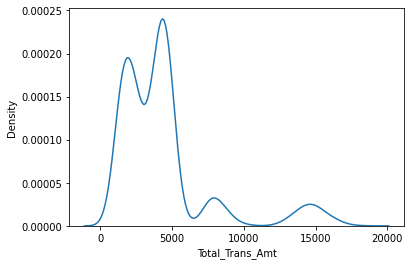

In [47]:
sns.kdeplot(dff['Total_Trans_Amt'])
dff['Total_Trans_Amt'].skew()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


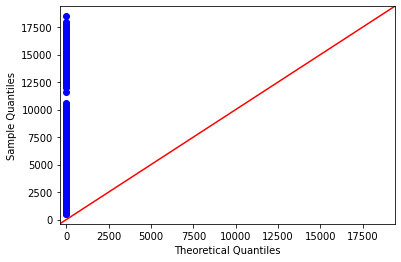

In [48]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(dff['Total_Trans_Amt'], line='45')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


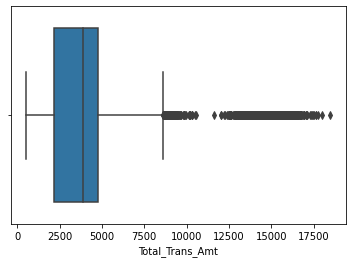

In [49]:
sns.boxplot(dff['Total_Trans_Amt'])

In [50]:
X = dff.drop(['Attrition_Flag'] , axis = 1)
y = dff['Attrition_Flag']

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.16540558,  1.05995565,  0.50336813, ...,  2.49464476,
        -0.42267548, -0.73643691],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.40085868,
        -0.42267548,  1.35788957],
       [ 0.58305837,  1.05995565,  0.50336813, ..., -0.40085868,
         2.36588126, -0.73643691],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ..., -0.40085868,
        -0.42267548,  1.35788957],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.40085868,
        -0.42267548, -0.73643691],
       [-0.41489356, -0.9434357 , -0.26654715, ..., -0.40085868,
        -0.42267548,  1.35788957]])

without any sampling techniques 

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42 ,shuffle = True, stratify = y)

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [55]:
import warnings
warnings.filterwarnings('ignore')


log = LogisticRegression()

parameters = {'penalty' : ['l1', 'l2']}

grid_search = GridSearchCV(estimator= log,
                          param_grid = parameters, scoring = 'accuracy',cv = 10 , n_jobs=-1)
grid_search.fit(X_train , y_train)

y_pred = grid_search.predict(X_test)

print(cross_val_score(grid_search, X, y, cv=10 , n_jobs=-1).mean())
print(classification_report(y_test, y_pred))

0.8577094608040141
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2551
           1       0.63      0.48      0.54       488

    accuracy                           0.87      3039
   macro avg       0.77      0.71      0.73      3039
weighted avg       0.86      0.87      0.86      3039



undersampling the majority class

In [56]:
we0 = dff[dff['Attrition_Flag'] == 0].sample(1627)
we1 = dff[dff['Attrition_Flag'] == 1]

sw = pd.concat([we0 , we1] , axis = 0)
sw['Attrition_Flag'].value_counts()

X = sw.drop(['Attrition_Flag'], axis = 1)
y =  sw['Attrition_Flag']

scaler = StandardScaler()
scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                   y, test_size=0.30, random_state=42 , shuffle = True , stratify = y)

In [57]:
X_test.shape

(977, 23)

In [58]:
import warnings
warnings.filterwarnings('ignore')







log2 = LogisticRegression()



parameters = {'penalty' : ['l1', 'l2']}

grid_search2 = GridSearchCV(estimator= log2,
                          param_grid = parameters, scoring = 'accuracy',cv = 10 , n_jobs=-1)
grid_search2.fit(X_train , y_train)

y_pred = grid_search2.predict(X_test)

print(cross_val_score(grid_search, X, y, cv=10 , n_jobs=-1).mean())
print(classification_report(y_test, y_pred))

0.7958801321378008
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       489
           1       0.81      0.84      0.83       488

    accuracy                           0.82       977
   macro avg       0.82      0.82      0.82       977
weighted avg       0.82      0.82      0.82       977



over sampling the minority class

In [59]:
we0 = dff[dff['Attrition_Flag'] == 0]
we1 = dff[dff['Attrition_Flag'] == 1].sample(8500 , replace = True)

sw = pd.concat([we0 , we1] , axis = 0)
sw['Attrition_Flag'].value_counts()

X = sw.drop(['Attrition_Flag'], axis = 1)
y =  sw['Attrition_Flag']

scaler = StandardScaler()
scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                   y, test_size=0.30, random_state=42 , shuffle = True , stratify = y)

In [60]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape 

(5100,)

In [61]:
import warnings
warnings.filterwarnings('ignore')

log3 = LogisticRegression()

parameters = {'penalty' : ['l1', 'l2']}

grid_search3 = GridSearchCV(estimator= log3,
                          param_grid = parameters, scoring = 'accuracy',cv = 10 , n_jobs=-1)
grid_search3.fit(X_train , y_train)

y_pred = grid_search3.predict(X_test)

print(cross_val_score(grid_search, X, y, cv=10 , n_jobs=-1).mean())
print(classification_report(y_test, y_pred))

0.7607058823529412
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2550
           1       0.82      0.83      0.82      2550

    accuracy                           0.82      5100
   macro avg       0.82      0.82      0.82      5100
weighted avg       0.82      0.82      0.82      5100



smote

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X = dff.drop(['Attrition_Flag'] , axis = 1)
y = dff['Attrition_Flag']



In [63]:
X , y = smote.fit_resample(X , y)

In [64]:
y.shape

(17000,)

In [65]:
scaler = StandardScaler()
scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                   y, test_size=0.30, random_state=42 , shuffle = True , stratify = y)

In [66]:
import warnings
warnings.filterwarnings('ignore')

log3 = LogisticRegression()

parameters = {'penalty' : ['l1', 'l2']}

grid_search3 = GridSearchCV(estimator= log3,
                          param_grid = parameters, scoring = 'accuracy',cv = 10 , n_jobs=-1)
grid_search3.fit(X_train , y_train)

y_pred = grid_search3.predict(X_test)

print(cross_val_score(grid_search, X, y, cv=10 , n_jobs=-1).mean())
print(classification_report(y_test, y_pred))

0.7793529411764706
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      2550
           1       0.80      0.81      0.80      2550

    accuracy                           0.80      5100
   macro avg       0.80      0.80      0.80      5100
weighted avg       0.80      0.80      0.80      5100



it can be observed that smote is consistent 

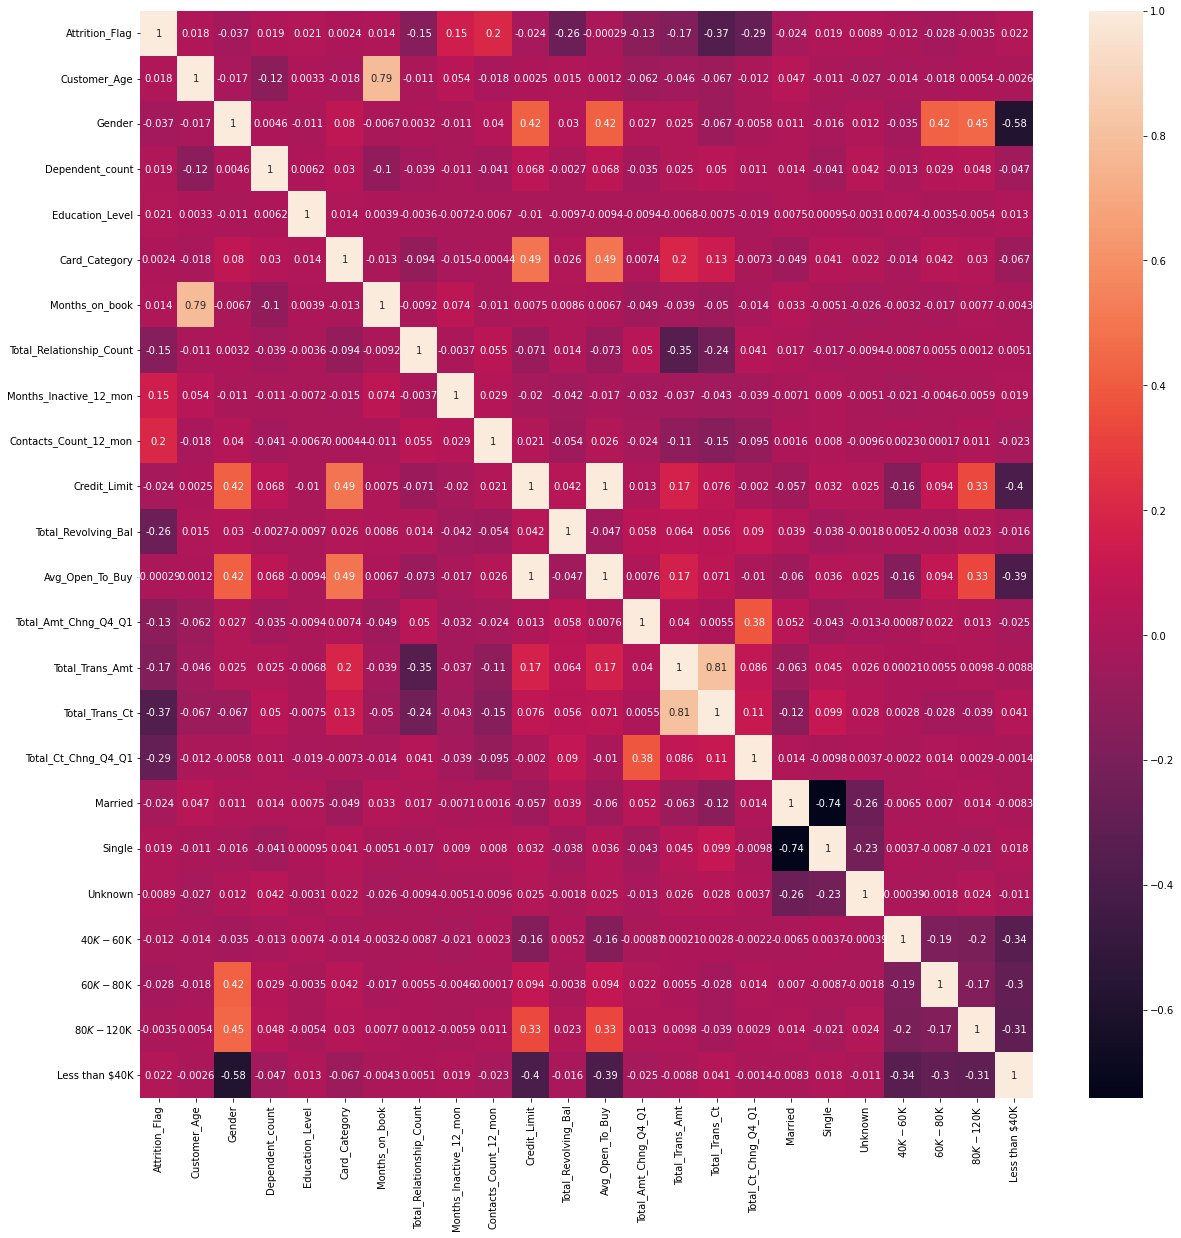

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

dff.corr()
plt.figure(figsize=(20 , 20))
g = sns.heatmap(dff.corr() , annot = True, )

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

X = dff.drop(['Attrition_Flag'] , axis = 1)
y = dff['Attrition_Flag']

logew = LogisticRegression()

selector = RFECV(logew, step=1,cv=10)

In [38]:
import warnings
warnings.filterwarnings('ignore')

model = selector.fit(X, y)
model.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [39]:
Xnew = model.transform(X)

In [43]:
Xnew = X.iloc[:,model.support_]

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X , y = smote.fit_resample(Xnew  , y)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X , y = smote.fit_resample(Xnew  , y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(Xnew)
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                   y, test_size=0.30, random_state=42 , shuffle = True , stratify = y)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(Xnew)
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                   y, test_size=0.30, random_state=42 , shuffle = True , stratify = y)

In [48]:
import warnings
warnings.filterwarnings('ignore')

log5 = LogisticRegression()

parameters = {'penalty' : ['l1', 'l2']}

grid_search5 = GridSearchCV(estimator= log5,
                          param_grid = parameters, scoring = 'accuracy',cv = 10 , n_jobs=-1)
grid_search5.fit(X_train , y_train)

y_pred = grid_search5.predict(X_test)

print(cross_val_score(grid_search5, X, y, cv=10 , n_jobs=-1).mean())
print(classification_report(y_test, y_pred))

0.8137647058823531
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2550
           1       0.85      0.82      0.83      2550

    accuracy                           0.84      5100
   macro avg       0.84      0.84      0.84      5100
weighted avg       0.84      0.84      0.84      5100



with rfe

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = dff.drop(['Attrition_Flag'] , axis = 1)
y = dff['Attrition_Flag']

logew = LogisticRegression()

rfe = RFE(estimator=logew , n_features_to_select=10)

In [50]:
mode = rfe.fit(X,y)

In [51]:
Xnew = X.iloc[:,mode.support_]

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X , y = smote.fit_resample(Xnew  , y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(Xnew)
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                   y, test_size=0.30, random_state=42 , shuffle = True , stratify = y)

In [54]:
import warnings
warnings.filterwarnings('ignore')

log5 = LogisticRegression()

parameters = {'penalty' : ['l1', 'l2']}

grid_search5 = GridSearchCV(estimator= log5,
                          param_grid = parameters, scoring = 'accuracy',cv = 10 , n_jobs=-1)
grid_search5.fit(X_train , y_train)

y_pred = grid_search5.predict(X_test)

print(cross_val_score(grid_search5, X, y, cv=10 , n_jobs=-1).mean())
print(classification_report(y_test, y_pred))

0.7257058823529412
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      2550
           1       0.75      0.74      0.74      2550

    accuracy                           0.75      5100
   macro avg       0.75      0.75      0.75      5100
weighted avg       0.75      0.75      0.75      5100



In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = dff.drop(['Attrition_Flag'] , axis = 1)
y = dff['Attrition_Flag']

logew = LogisticRegression()

rfe = RFE(estimator=logew , n_features_to_select=15)

mode = rfe.fit(X,y)

Xnew = X.iloc[:,mode.support_]

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X , y = smote.fit_resample(Xnew  , y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(Xnew)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42 , shuffle = True , stratify = y)
                                                    
import warnings
warnings.filterwarnings('ignore')

log5 = LogisticRegression()

parameters = {'penalty' : ['l1', 'l2']}

grid_search5 = GridSearchCV(estimator= log5,
                          param_grid = parameters, scoring = 'accuracy',cv = 10 , n_jobs=-1)
grid_search5.fit(X_train , y_train)

y_pred = grid_search5.predict(X_test)

print(cross_val_score(grid_search5, X, y, cv=10 , n_jobs=-1).mean())
print(classification_report(y_test, y_pred))


0.824529411764706
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2550
           1       0.83      0.83      0.83      2550

    accuracy                           0.83      5100
   macro avg       0.83      0.83      0.83      5100
weighted avg       0.83      0.83      0.83      5100

